# Drug Discovery for Dengue Virus NS-3 Helicase

## Primary Authors:
- Clarissa Harmoko
- Kai Ze Tam
- Kyle Carlo Lasala
- Muhammad Abdul Aziz Ghazali

## Prepare Libraries

In [10]:
!pip install biopython
!pip install nglview==3.0.8
!pip install "ipywidgets>=7,<8"

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
# node needed! 
# installs the js packages for nglview
!npm i


up to date, audited 548 packages in 2s

168 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities


In [18]:
!pip install rdkit

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/22.5 MB ? eta -:--:--
   - -------------------------------------- 1.0/22.5 MB 8.4 MB/s eta 0:00:03
   - -------------------------------------- 1.0/22.5 MB 8.4 MB/s eta 0:00:03
   -- ------------------------------------- 1.6/22.5 MB 2.5 MB/s eta 0:00:09
   --- ------------------------------------ 2.1/22.5 MB 3.0 MB/s eta 0:00:07
   --- ------------------------------------ 2.1/22.5 MB 3.0 MB/s eta 0:00:07
   ---- ----------------------------------- 2.4/22.5 MB 1.8 MB/s eta 0:00:12
   ----- ---------------------------------- 3.1/22.5 MB 2.3 MB/s eta 0:00:09
   ------- -------------------------------- 4.2/22.5 MB 2.6 MB/s eta 0:00:08
   -------- ------------------------------- 4.7/22.5 MB 2.5 MB/s eta 0:00:08
   --------- ------------------------------ 5.2/22.5 MB 2.7 MB/s eta 0:00:07
   --------- ------------------------------ 5.2/22.5 MB 2.7 MB/s eta 0:00:07
   --

In [20]:
import os
import ipywidgets as widgets 
from Bio.PDB import PDBList, PDBParser
from rdkit import Chem
from rdkit.Chem import Draw
import nglview as nv

## Prepare Dataset

### Download the target protein
- The target is the NS3 RNA helicase (a viral protein/enzyme) of Dengue virus serotype 2 (DENV2). This helicase unwinds double-stranded RNA (dsRNA) intermediates into single-stranded RNA (ssRNA), a critical step in the replication of the viral genome.

In [13]:
pdb_id = "2BMF"
pdbl = PDBList()

In [14]:
file_path = pdbl.retrieve_pdb_file(pdb_id, file_format="pdb", pdir="./")
file_name = f"DENV2_RNA_Helicase_2_4A.pdb"
if os.path.exists(file_name):
    os.remove(file_name)
os.rename(file_path, file_name)

In [15]:
parser = PDBParser(QUIET=True)
structure = parser.get_structure(pdb_id, file_name)
view = nv.show_biopython(structure)

In [16]:
view

NGLWidget()

### Select a particular ligand
- The ligand selected is based on the study of Halim et al. [1]. The ligand with the highest Chemgauss2 (CG2) score is selected. The Simplified Molecular Input Line Entry System (SMILES) format of the selected ligand is `CCOc1ccc2c(c1)sc(n2)NC(=O)c3c(cnc(n3)SC)Br`. This will be used to benchmark the tools.

[1] S. A. Halim, S. Khan, A. Khan, A. Wadood, F. Mabood, J. Hussain, and A. Al-Harrasi, “Targeting Dengue Virus NS-3 Helicase by Ligand based Pharmacophore Modeling and Structure based Virtual Screening,” Frontiers in Chemistry, vol. 5, p. 88, 2017. [Online]. Available: https://doi.org/10.3389/fchem.2017.00088

In [22]:
ligand = "CCOc1ccc2c(c1)sc(n2)NC(=O)c3c(cnc(n3)SC)Br"

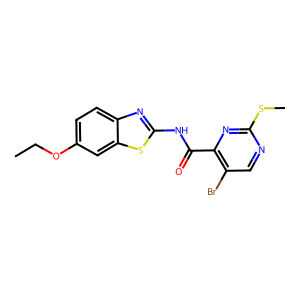

In [24]:
mol = Chem.MolFromSmiles(ligand)
Draw.MolToImage(mol)